# Support Vector Machine: 

The objective of the $ Support Vector Machine $ algorithm is to find a hyperplane in an N- dimensional space (N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, many possible hyperplanes could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence. 
<br>
<br>
SVM is based on maximizing the margin and thereby creating the largest possible distance between the separating hyperplane and the instances to reduce an upper bound on the expected generalization error. Some instances of the training dataset called
_support vectors_, which are close to the separating hyperplane and provide the most useful information for classification, are utilized in SVM training. 
<br>
<br>
In addition, an appropriate kernel function is used to transform the data into a high-dimension to use linear discriminate functions.

###### 1. import the necessary libraries

In [1]:
import pandas as pd # for reading the file, manipulation and analysis in dataframe
import numpy as np # provide mathamtical functions
import seaborn as sns # interative Graphs 
import warnings # for ignoring the warnings 
warnings.filterwarnings("ignore")
warnings.warn('my warning')

###### 2. Read the dataset

In [2]:
db_data=pd.read_csv('diabetes.csv')
db_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# shape of the dataset
db_data.shape

(768, 9)

###### 3. Analysis the Dataset

In [4]:
# Check for the Null column values in the dataset
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
db_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

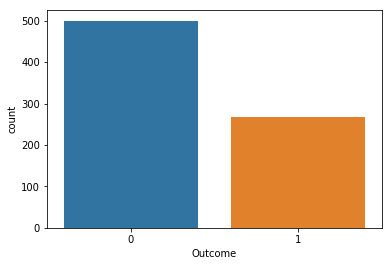

In [6]:
# check for the positive and negative labels.
sns.countplot(x="Outcome",data=db_data)

###### 4. Preprocess the Dataset (Dataset splitting for training and testing)

In [7]:
X=db_data.drop(['Outcome'],axis=1) 
y=db_data['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### 5. Creating the SVM liear model

In [15]:
from sklearn import svm
model=svm.SVC(kernel="linear")

In [16]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred=model.predict(X_test)
# Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7445887445887446

###### 6. Validate the Accuracy of the model

A $CONFUSIONMATRIX $ also known as an error matrix. A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 
It allows the visualization of the performance of an algorithm.

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[122  29]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



###### AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

$AUC - ROC$ curve is a performance measurement for classification problem at various thresholds settings. 
_ROC is a probability curve and AUC represents degree or measure of separability._ It tells how much model is capable of distinguishing between classes. 
<br>
<br>
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
<br>
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

AUC: 0.71647


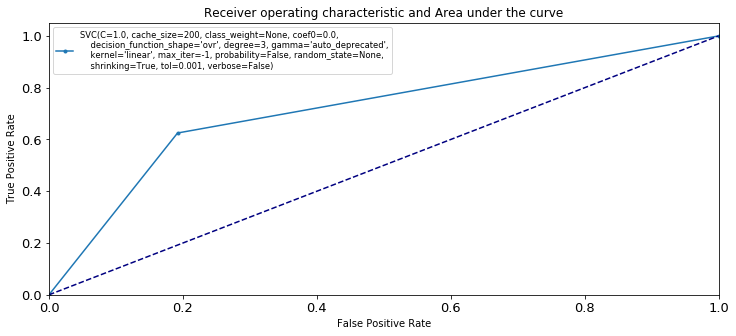

In [20]:
plt.subplots(figsize=(12,5)) 
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.5f' % auc)
plt.plot(fpr, tpr,marker='.',label=model)
# plot no skill
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
 # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve', fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
plt.show()